# Feed Forward Neural Network
## David Darigan (C00263218)

Using Feed Forward to identify a digit of 0-9 (utilizing the MNIST training data set)

# Changelog

# Change 1

Using two connected layers and relu with 10 pass throughs, we've got a tiny loss of 0.03219
<br>
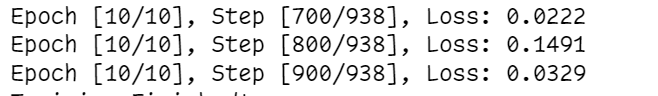
<br>
down from the initial loss of 0.5~
<br>
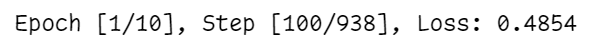
<br>
# Change 2

Changing the activation function to sigmoid, we not only end up with a worse loss but also one that changes up and down through passes, indicating it isn't dealing well with some number sizes.
<br>
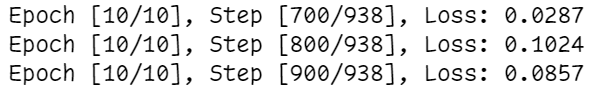

# Change 3

Changing the activation function to softmax, the loss differences between each other aren't as significant as sigmoid but it is still a poor loss rate
<br>

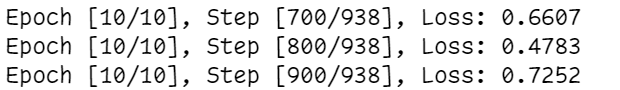

# Change 4

Changing the hidden layer from 128 to 256 (another resolution for images) with the activation back to relu function shows no improvement (.5~ or 50% loss is very bad)
<br>

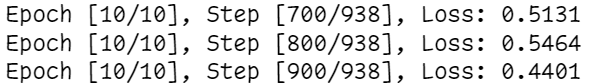

but it also starts off worse than 128 (implying 256 is just more noise to wade through)

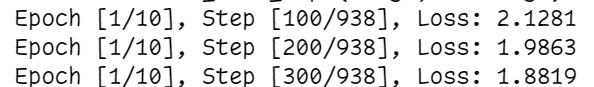

# Change 5

Changing the hidden layer from 128 to 64, while improved from 256 is still poor compared to 128 (a loss rate of .1 or 10% is 'alright' for this use case)

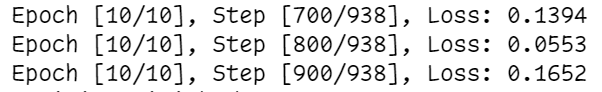

# Change 6

Increased pass-throughs from 10 to 20, no real improvement (about 0.01%) 

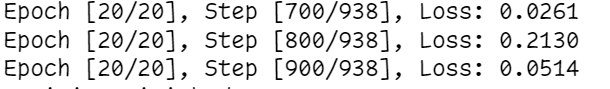

# Change 7

Accuracy on test set is 10% which is abysmal and indicates overfitting 

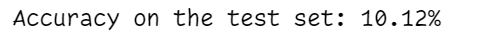

# Change 8

Previous version had two different feedforwards involved when it should have been the same, accuracy on test model is 97% (acceptable, very accurate but likely not overfit)

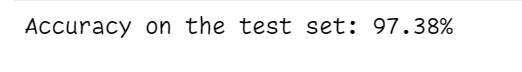

In [54]:
%pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install torch

  Using cached torch-2.2.2-cp312-cp312-win_amd64.whl.metadata (26 kB)
  Using cached filelock-3.13.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
Using cached torch-2.2.2-cp312-cp312-win_amd64.whl (198.5 MB)
Using cached filelock-3.13.4-py3-none-any.whl (11 kB)
Using cached fsspec-2024.3.1-py3-none-any.whl (171 kB)
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\convert-caffe2-to-onnx.exe' -> 'c:\\Python312\\Scripts\\convert-caffe2-to-onnx.exe.deleteme'



In [5]:
import torch
import torch.nn as nn
import torch.optim as optimZ
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

ModuleNotFoundError: No module named 'torch'

In [ ]:
# Loading training / test sets
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Creating the feed forward neural network
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Two connected layers using relu
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [ ]:
# MNIST image sizes are 28 * 28, giving us an input layer of 784 pixels (per digit) before the bias
input_size = 28 * 28

# Size of our hidden layer, no real good size but a rule of thumb is number between the outputs (10)
# ..and inputs (784 + 1 bias). 128 is also significant as a typical square image size.
hidden_size = 256

# The output node is a range of placements where 1 indicates 
# ..that the output is the number according to that placement
# ..(e.g 000 is 0, 1, 2 places, therefore 001 is '2')
output_size = 10


learning_rate = 0.001


# Number of entire pass throughs through the layer
# (not related)
num_epochs = 10

model = FeedForwardNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training
total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

print('Training Finished!')
torch.save(model.state_dict(), "mnist_feed_forward_model.pth")

Epoch [1/10], Step [100/938], Loss: 0.4211
Epoch [1/10], Step [200/938], Loss: 0.4272
Epoch [1/10], Step [300/938], Loss: 0.2724
Epoch [1/10], Step [400/938], Loss: 0.2130
Epoch [1/10], Step [500/938], Loss: 0.2156
Epoch [1/10], Step [600/938], Loss: 0.2518
Epoch [1/10], Step [700/938], Loss: 0.1824
Epoch [1/10], Step [800/938], Loss: 0.1076
Epoch [1/10], Step [900/938], Loss: 0.0956
Epoch [2/10], Step [100/938], Loss: 0.2492
Epoch [2/10], Step [200/938], Loss: 0.1092
Epoch [2/10], Step [300/938], Loss: 0.3946
Epoch [2/10], Step [400/938], Loss: 0.1165
Epoch [2/10], Step [500/938], Loss: 0.1614
Epoch [2/10], Step [600/938], Loss: 0.2115
Epoch [2/10], Step [700/938], Loss: 0.0687
Epoch [2/10], Step [800/938], Loss: 0.2030
Epoch [2/10], Step [900/938], Loss: 0.2437
Epoch [3/10], Step [100/938], Loss: 0.0812
Epoch [3/10], Step [200/938], Loss: 0.1714
Epoch [3/10], Step [300/938], Loss: 0.0956
Epoch [3/10], Step [400/938], Loss: 0.1277
Epoch [3/10], Step [500/938], Loss: 0.1670
Epoch [3/10

In [2]:
# Load the saved model
trained_model = FeedForwardNN(input_size, hidden_size, output_size)
trained_model.load_state_dict(torch.load('mnist_feed_forward_model.pth'))
trained_model.eval()

# Define a function to test the model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            print(predicted)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')

# Test the model
test_model(model, test_loader)

NameError: name 'FeedForwardNN' is not defined